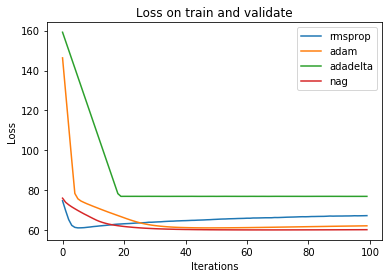

In [1]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

def load_data():
    # read the dataset and get x and label y
    x_train, y_train = ds.load_svmlight_file("/Users/zoushuai/Downloads/a9a.txt",123)
    x_validate,y_validate = ds.load_svmlight_file("/Users/zoushuai/Downloads/a9a.t",123)
    x_train = x_train.toarray()
    x_validate = x_validate.toarray()
    return x_train, x_validate, y_train, y_validate

def linear_func(x, seta, b):
    sum_setaX = np.dot(seta,x)
    return sum_setaX + b

def loss_func(x_set,y_set,seta_in,b_in,c):
    count = 0
    for x,y in zip(x_set,y_set):
        conp = 1 - y * linear_func(x,seta_in,b_in)
        if conp > 0:
            count += conp
        else:
            count += 0
    seta_squa = seta_in * seta_in
    loss = 0.5 * seta_squa.sum(axis=0) + c * count
    return loss
def calculate_delta(batch_x_train,batch_y_train,seta_in,b_in,sum_delta_seta,sum_delta_b):
    for x, y in zip(batch_x_train, batch_y_train):
        if (1 - y * linear_func(x, seta_in, b_in)) >= 0:
            delta_seta = - c * x * y
            delta_b = -1 * c * y
        else:
            delta_seta = 0
            delta_b = 0
        sum_delta_seta += delta_seta
        sum_delta_b += delta_b
    return sum_delta_seta,sum_delta_b
def get_batch(iter,maxcycle,batch_size,x_set,y_set,index,left):
    if (iter == maxcycle):
        batch_x_train = x_set[index[iter * batch_size:iter * batch_size + left]]
        batch_y_train = y_set[index[iter * batch_size:iter * batch_size + left]]
    else:
        batch_x_train = x_set[index[iter * batch_size:(iter + 1) * batch_size]]
        batch_y_train = y_set[index[iter * batch_size:(iter + 1) * batch_size]]
    return batch_x_train,batch_y_train
def rmsprop(x_set,y_set,seta_in,b_in,alpha):
    maxcycle = 100
    batch_size = x_set.shape[0] // (maxcycle)
    left = x_set.shape[0] - maxcycle * batch_size
    #define a index array to random split the datasets
    index = [tem for tem in range(x_set.shape[0])]
    random.shuffle(index)
    r = 0
    #avoid 0
    av_0 = 0.000001
    dec_speed = 0.95
    for i in range(maxcycle+1):
        batch_x_train, batch_y_train = get_batch(i, maxcycle, batch_size, x_set, y_set, index, left)
        sum_delta_seta = np.zeros(x_set.shape[1])
        sum_delta_b = 0
        sum_delta_seta, sum_delta_b = calculate_delta(batch_x_train, batch_y_train, seta_in, b_in, sum_delta_seta,sum_delta_b)
        r = dec_speed*r + (1-dec_speed)*np.square(sum_delta_seta / batch_x_train.shape[0])
        seta_in = seta_in - (alpha/(np.sqrt(r)+av_0)) * (sum_delta_seta / batch_x_train.shape[0])
        b_in = b_in - alpha * (sum_delta_b / batch_x_train.shape[0])
    return seta_in,b_in
def adam(x_set,y_set,seta_in,b_in,alpha):
    maxcycle = 100
    batch_size = x_set.shape[0] // (maxcycle)
    left = x_set.shape[0] - maxcycle * batch_size
    #define a index array to random split the datasets
    index = [tem for tem in range(x_set.shape[0])]
    random.shuffle(index)
    s = 0
    r = 0
    #avoid 0
    av_0 = 0.00000001
    dec_speed_1 = 0.9
    dec_speed_2 = 0.999
    for i in range(maxcycle+1):
        batch_x_train, batch_y_train = get_batch(i, maxcycle, batch_size, x_set, y_set, index, left)
        sum_delta_seta = np.zeros(x_set.shape[1])
        sum_delta_b = 0
        sum_delta_seta, sum_delta_b = calculate_delta(batch_x_train, batch_y_train, seta_in, b_in, sum_delta_seta,sum_delta_b)
        s = dec_speed_1*s + (1-dec_speed_1)*(sum_delta_seta / batch_x_train.shape[0])
        r = dec_speed_2*r + (1-dec_speed_2)*np.square(sum_delta_seta / batch_x_train.shape[0])
        s_bias = s / (1 - dec_speed_1)
        r_bias = r / (1 - dec_speed_2)
        seta_in = seta_in - (alpha/(np.sqrt(r_bias)+av_0)) * s_bias
        b_in = b_in - alpha * (sum_delta_b / batch_x_train.shape[0])
    return seta_in,b_in
def adadelta(x_set,y_set,seta_in,b_in,alpha):
    maxcycle = 100
    batch_size = x_set.shape[0] // (maxcycle)
    left = x_set.shape[0] - maxcycle * batch_size
    #define a index array to random split the datasets
    index = [tem for tem in range(x_set.shape[0])]
    random.shuffle(index)
    r = 0
    #avoid 0
    av_0 = 0.000001
    dec_speed = 0.95
    for i in range(maxcycle+1):
        batch_x_train, batch_y_train = get_batch(i, maxcycle, batch_size, x_set, y_set, index, left)
        sum_delta_seta = np.zeros(x_set.shape[1])
        sum_delta_b = 0
        sum_delta_seta, sum_delta_b = calculate_delta(batch_x_train, batch_y_train, seta_in, b_in, sum_delta_seta,sum_delta_b)
        r = dec_speed*r + (1-dec_speed)*np.square(sum_delta_seta / batch_x_train.shape[0])
        alpha_1 = np.sqrt(np.square(seta_in))
        seta_in = seta_in - (alpha_1/(np.sqrt(r)+av_0)) * (sum_delta_seta / batch_x_train.shape[0])
        b_in = b_in - alpha * (sum_delta_b / batch_x_train.shape[0])
    return seta_in,b_in
def nag(x_set,y_set,seta_in,b_in,alpha):
    maxcycle = 100
    batch_size = x_set.shape[0] // (maxcycle)
    left = x_set.shape[0] - maxcycle * batch_size
    #define a index array to random split the datasets
    index = [tem for tem in range(x_set.shape[0])]
    random.shuffle(index)
    r = 0
    #avoid 0
    av_0 = 0.000001
    dec_speed = 0.95
    for i in range(maxcycle+1):
        batch_x_train, batch_y_train = get_batch(i, maxcycle, batch_size, x_set, y_set, index, left)
        sum_delta_seta = np.zeros(x_set.shape[1])
        sum_delta_b = 0
        sum_delta_seta, sum_delta_b = calculate_delta(batch_x_train, batch_y_train, seta_in, b_in, sum_delta_seta,sum_delta_b)
        r = dec_speed*r + alpha*(sum_delta_seta / batch_x_train.shape[0])
        seta_in = seta_in - r
        b_in = b_in - alpha * (sum_delta_b / batch_x_train.shape[0])
    return seta_in,b_in
if __name__ == '__main__':
    x_train, x_validate, y_train, y_validate = load_data()
    maxIters = 100
    #different c can result in big difference
    # c = 0.008  0.01 0.001(bad) 0.004(not so good)
    c = 0.01
    delta_seta = np.zeros(x_train.shape[1])
    delta_b = 0
    iter_num = []

    validate_loss_rmsprop_sum = []
    validate_loss_adam_sum = []
    validate_loss_adadelta_sum = []
    validate_loss_nag_sum = []

    seta_rmsprop = np.zeros(x_train.shape[1])
    b_rmsprop = 0.01
    seta_adam = np.zeros(x_train.shape[1])
    b_adam = 0.01
    seta_adadelta = np.zeros(x_train.shape[1])
    b_adadelta = 0.01
    seta_nag = np.zeros(x_train.shape[1])
    b_nag = 0.01

    for i in range(maxIters):
        seta_rmsprop, b_rmsprop = rmsprop(x_train, y_train, seta_rmsprop, b_rmsprop, 0.001)
        validate_loss_rmsprop = loss_func(x_validate, y_validate, seta_rmsprop, b_rmsprop,c)
        validate_loss_rmsprop_sum.append(validate_loss_rmsprop)

        seta_adam, b_adam = adam(x_train, y_train, seta_adam, b_adam, 0.0001)
        validate_loss_adam = loss_func(x_validate, y_validate, seta_adam, b_adam,c)
        validate_loss_adam_sum.append(validate_loss_adam)

        seta_adadelta, b_adadelta = adadelta(x_train, y_train, seta_adadelta, b_adadelta, 0.1)
        validate_loss_adadelta = loss_func(x_validate, y_validate, seta_adadelta, b_adadelta,c)
        validate_loss_adadelta_sum.append(validate_loss_adadelta)

        seta_nag, b_nag = nag(x_train, y_train, seta_nag, b_nag, 0.05)
        validate_loss_nag = loss_func(x_validate, y_validate, seta_nag, b_nag,c)
        validate_loss_nag_sum.append(validate_loss_nag)

        iter_num.append(i)

    plt.plot(iter_num, validate_loss_rmsprop_sum, label="rmsprop")
    plt.plot(iter_num, validate_loss_adam_sum, label="adam")
    plt.plot(iter_num, validate_loss_adadelta_sum, label="adadelta")
    plt.plot(iter_num, validate_loss_nag_sum, label="nag")

    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss on train and validate")
    plt.legend(loc='upper right')
    plt.show()